In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('amazon-alexa.tsv', sep='\t')

In [3]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
positive_review = data[data['feedback']==1]

In [5]:
positive_review

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [6]:
negative_reviews = data[data['feedback']==0]

In [7]:
negative_reviews

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0
...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0
3091,1,30-Jul-18,Black Dot,I didn’t order it,0


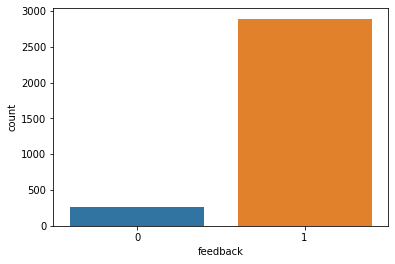

In [8]:
sns.countplot(data['feedback'], label='Count')

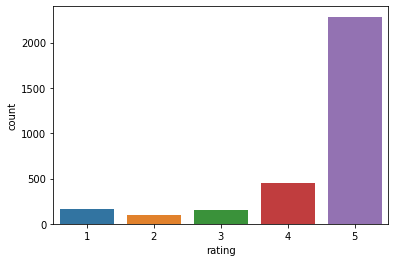

In [9]:
sns.countplot(x = 'rating', data = data, label = 'Count')

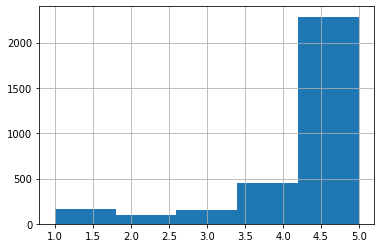

In [10]:
data['rating'].hist(bins=5)

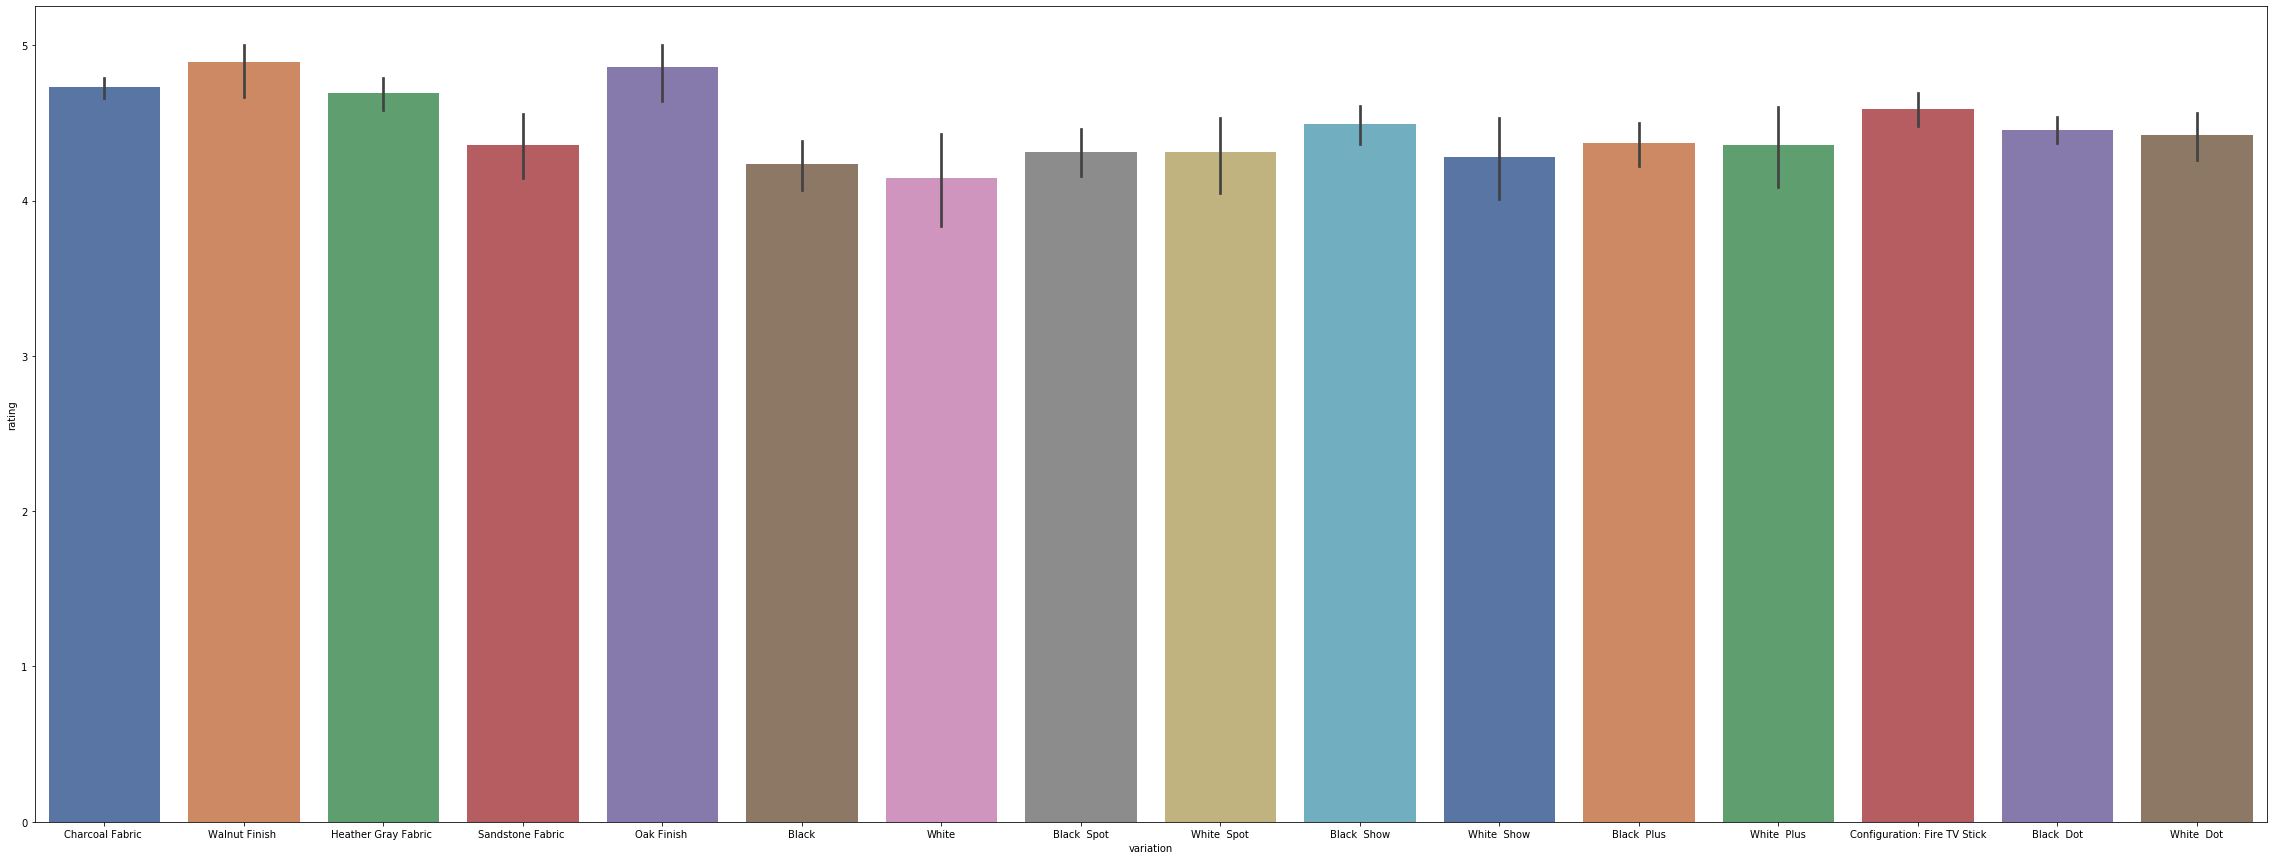

In [11]:
plt.figure(figsize = (40,15))
sns.barplot(x = 'variation', y = 'rating', data = data, palette='deep')

In [12]:
data.drop(['date','rating'], axis = 1, inplace = True)

In [13]:
data.head

<bound method NDFrame.head of              variation                                   verified_reviews  \
0     Charcoal Fabric                                       Love my Echo!   
1     Charcoal Fabric                                           Loved it!   
2       Walnut Finish   Sometimes while playing a game, you can answer...   
3     Charcoal Fabric   I have had a lot of fun with this thing. My 4 ...   
4     Charcoal Fabric                                               Music   
...                ...                                                ...   
3145        Black  Dot  Perfect for kids, adults and everyone in betwe...   
3146        Black  Dot  Listening to music, searching locations, check...   
3147        Black  Dot  I do love these things, i have them running my...   
3148        White  Dot  Only complaint I have is that the sound qualit...   
3149        Black  Dot                                               Good   

      feedback  
0            1  
1          

In [14]:
variation_dummies = pd.get_dummies(data['variation'], drop_first = True )

In [15]:
variation_dummies

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [16]:
data.drop(['variation'], axis = 1, inplace = True)

In [17]:
data

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1
...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1
3146,"Listening to music, searching locations, check...",1
3147,"I do love these things, i have them running my...",1
3148,Only complaint I have is that the sound qualit...,1


In [18]:
data = pd.concat([data, variation_dummies], axis = 1)

In [19]:
data.shape

(3150, 17)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
data_countvect = vectorizer.fit_transform(data['verified_reviews'])

In [21]:
data_countvect.shape

(3150, 4044)

In [22]:
print(vectorizer.get_feature_names())

['00', '000', '07', '10', '100', '100x', '11', '1100sf', '12', '129', '12am', '15', '150', '18', '19', '1964', '1990', '1gb', '1rst', '1st', '20', '200', '2000', '2017', '229', '23', '24', '25', '29', '2nd', '2package', '30', '300', '30pm', '34', '360', '39', '3rd', '3x', '3xs', '40', '45', '48', '4am', '4ghz', '4k', '4th', '50', '54', '5am', '5ghz', '5th', '600', '62', '672', '6th', '70', '75', '79', '80', '80s', '81', '83', '85', '88', '888', '8gb', '90', '91', '911', '99', '_specifically_', 'a1', 'a19', 'abay', 'abc', 'abd', 'abilities', 'ability', 'able', 'abode', 'about', 'above', 'absolutely', 'absolutly', 'ac', 'accent', 'acceptable', 'accepting', 'access', 'accessable', 'accessible', 'accessing', 'accessories', 'accesss', 'accident', 'accidentally', 'accompanying', 'accomplish', 'accomplished', 'according', 'accordingly', 'account', 'accounts', 'accuracy', 'accurate', 'accurately', 'accustom', 'acknowledge', 'acoustical', 'across', 'act', 'acting', 'action', 'actions', 'activat

In [23]:
print(data_countvect.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [24]:
data.drop(['verified_reviews'], axis=1, inplace = True)

In [25]:
reviews = pd.DataFrame(data_countvect.toarray())

In [26]:
X = pd.concat( [data, reviews], axis = 1)

In [27]:
type(X)

pandas.core.frame.DataFrame

In [28]:
y = data['feedback']
X.drop(['feedback'], axis = 1, inplace = True )

In [29]:
X.shape

(3150, 4059)

In [30]:
reviews.shape

(3150, 4044)

In [31]:
X.head(5)

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
y.shape

(3150,)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2 )

In [34]:
X_train.shape

(2520, 4059)

In [35]:
X_test.shape

(630, 4059)

In [36]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 400, activation = 'relu', input_shape = (4059,)))
model.add(tf.keras.layers.Dense(units = 400, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               1624000   
_________________________________________________________________
dense_1 (Dense)              (None, 400)               160400    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 401       
Total params: 1,784,801
Trainable params: 1,784,801
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [39]:
epochs_hist = model.fit(X_train, y_train, epochs = 10 )

Train on 2520 samples
Epoch 1/10


InternalError:  Blas GEMM launch failed : a.shape=(32, 4059), b.shape=(4059, 400), m=32, n=400, k=4059
	 [[node dense/MatMul (defined at C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\tensorflow_core\python\framework\ops.py:1751) ]] [Op:__inference_keras_scratch_graph_772]

Function call stack:
keras_scratch_graph


In [ ]:
y_pred_train = model.predict(X_train)

In [ ]:
y_pred_train

In [ ]:
y_pred_train = (y_pred_train > 0.5 )

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap( cm, annot = True )

In [ ]:
y_pred_test = model.predict( X_test )

In [ ]:
y_pred_test = (y_pred_test > 0.5 )

In [ ]:
cm = confusion_matrix(y_test, y_pred_test )
sns.heatmap(cm, annot = True )

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.title( 'Model Loss Progress during Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [ ]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model Accuracy Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')